In [1]:
""" Generate histogram data for in technical note.
-------------------------------------------------------------------------------

Author: Rutger Hofste
Date: 20190605
Kernel: python35
Docker: rutgerhofste/gisdocker:ubuntu16.04


"""

SCRIPT_NAME = 'Y2019M06D05_RH_Hydrobasin6_Histogram_V01'
OUTPUT_VERSION = 1


S3_INPUT_PATH= "s3://wri-projects/Aqueduct30/processData/Y2017M08D02_RH_Merge_HydroBasins_V02/output_V04"

ec2_input_path = "/volumes/data/{}/input_V{:02.0f}".format(SCRIPT_NAME,OUTPUT_VERSION) 
ec2_output_path = "/volumes/data/{}/output_V{:02.0f}".format(SCRIPT_NAME,OUTPUT_VERSION) 
s3_output_path = "s3://wri-projects/Aqueduct30/processData/{}/output_V{:02.0f}/".format(SCRIPT_NAME,OUTPUT_VERSION)

print("S3_INPUT_PATH: ", S3_INPUT_PATH,
      "\ns3_output_path: ", s3_output_path)


S3_INPUT_PATH:  s3://wri-projects/Aqueduct30/processData/Y2017M08D02_RH_Merge_HydroBasins_V02/output_V04 
s3_output_path:  s3://wri-projects/Aqueduct30/processData/Y2019M06D05_RH_Hydrobasin6_Histogram_V01/output_V01/


In [2]:
import time, datetime, sys
dateString = time.strftime("Y%YM%mD%d")
timeString = time.strftime("UTC %H:%M")
start = datetime.datetime.now()
print(dateString,timeString)
sys.version
%matplotlib inline

Y2019M06D05 UTC 20:39


In [3]:
!rm -r {ec2_input_path}
!rm -r {ec2_output_path}
!mkdir -p {ec2_input_path}
!mkdir -p {ec2_output_path}


In [4]:
!aws s3 cp {S3_INPUT_PATH} {ec2_input_path} --recursive

download: s3://wri-projects/Aqueduct30/processData/Y2017M08D02_RH_Merge_HydroBasins_V02/output_V04/hybas_lev00_v1c_merged_fiona_V04.cpg to ../../../../data/Y2019M06D05_RH_Hydrobasin6_Histogram_V01/input_V01/hybas_lev00_v1c_merged_fiona_V04.cpg
download: s3://wri-projects/Aqueduct30/processData/Y2017M08D02_RH_Merge_HydroBasins_V02/output_V04/hybas_lev00_v1c_merged_fiona_V04.prj to ../../../../data/Y2019M06D05_RH_Hydrobasin6_Histogram_V01/input_V01/hybas_lev00_v1c_merged_fiona_V04.prj
download: s3://wri-projects/Aqueduct30/processData/Y2017M08D02_RH_Merge_HydroBasins_V02/output_V04/hybas_lev00_v1c_merged_fiona_5min_V04.tif to ../../../../data/Y2019M06D05_RH_Hydrobasin6_Histogram_V01/input_V01/hybas_lev00_v1c_merged_fiona_5min_V04.tif
download: s3://wri-projects/Aqueduct30/processData/Y2017M08D02_RH_Merge_HydroBasins_V02/output_V04/hybas_lev00_v1c_merged_fiona_V04.shx to ../../../../data/Y2019M06D05_RH_Hydrobasin6_Histogram_V01/input_V01/hybas_lev00_v1c_merged_fiona_V04.shx
download: s3:/

In [5]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
input_filename = "hybas_lev06_v1c_merged_fiona_V04.shp"

In [7]:
input_path = "{}/{}".format(ec2_input_path,input_filename)

In [8]:
gdf = gpd.read_file(filename=input_path)

In [9]:
gdf.head()

,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
0,8060000010,0,8060000010,8060000010,0.0,0.0,928.6,928.6,811101,0,1,0,1,POLYGON ((-137.9333333333333 58.90416666666669...
1,8060000060,0,8060000060,8060000060,0.0,0.0,28068.3,28068.3,811102,0,0,1,2,"POLYGON ((-136.425 59.8416666666667, -136.4283..."
2,8060000070,0,8060000070,8060000070,0.0,0.0,4585.4,4585.4,811103,0,1,0,3,(POLYGON ((-139.6430555555555 59.6625000000000...
3,8060000290,0,8060000290,8060000290,0.0,0.0,3774.6,3775.0,811104,0,0,1,4,POLYGON ((-139.6791666666666 60.74583333333334...
4,8060000300,0,8060000300,8060000300,0.0,0.0,1351.1,1351.1,811105,0,1,0,5,"POLYGON ((-139.9791666666667 59.7791666666667,..."


In [10]:
# SUB_AREA is Area of the individual polygon (i.e. sub-basin),  in square kilometers.

In [11]:
values = gdf["SUB_AREA"].values

In [12]:
median = np.median(values)

In [13]:
median

5317.6000000000004

In [14]:
bin_edges = np.logspace(start=0,stop=6,num=13,base=10)

In [15]:
bin_edges

array([  1.00000000e+00,   3.16227766e+00,   1.00000000e+01,
         3.16227766e+01,   1.00000000e+02,   3.16227766e+02,
         1.00000000e+03,   3.16227766e+03,   1.00000000e+04,
         3.16227766e+04,   1.00000000e+05,   3.16227766e+05,
         1.00000000e+06])

In [16]:
hist, bin_edges = np.histogram(values, bins=bin_edges)

<BarContainer object of 12 artists>

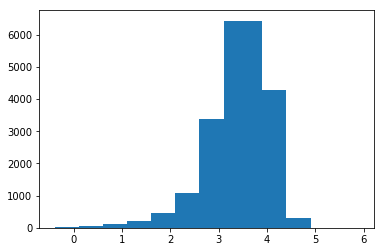

In [17]:
plt.bar(np.arange(len(hist))/2,hist)

In [18]:
output_filename = "histogram_values.csv"

In [19]:
output_path = "{}/{}".format(ec2_output_path,output_filename)

In [20]:
output_path

'/volumes/data/Y2019M06D05_RH_Hydrobasin6_Histogram_V01/output_V01/histogram_values.csv'

In [21]:
hist.tofile(output_path,sep=",")

In [22]:
output_filename_edges =  "histogram_binedges.csv"

In [23]:
output_path_edges = "{}/{}".format(ec2_output_path,output_filename_edges)

In [24]:
bin_edges.tofile(output_path_edges,sep=",")

In [25]:
!aws s3 cp {ec2_output_path} {s3_output_path} --recursive

upload: ../../../../data/Y2019M06D05_RH_Hydrobasin6_Histogram_V01/output_V01/histogram_binedges.csv to s3://wri-projects/Aqueduct30/processData/Y2019M06D05_RH_Hydrobasin6_Histogram_V01/output_V01/histogram_binedges.csv
upload: ../../../../data/Y2019M06D05_RH_Hydrobasin6_Histogram_V01/output_V01/histogram_values.csv to s3://wri-projects/Aqueduct30/processData/Y2019M06D05_RH_Hydrobasin6_Histogram_V01/output_V01/histogram_values.csv


In [26]:
end = datetime.datetime.now()
elapsed = end - start
print(elapsed)

0:00:23.211709


Previous runs:  
